<a href="https://colab.research.google.com/github/CrucifierBladex/ALGORITHMS/blob/master/PSA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#using opencv for image enhancement
#pip install opencv-python
#Python scripting language


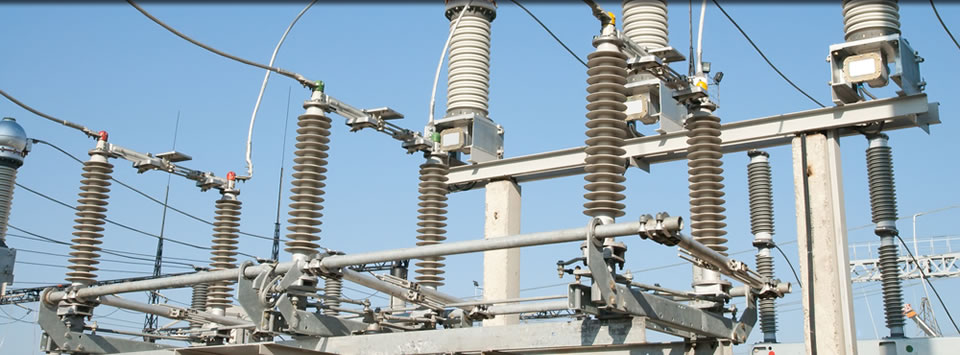

In [2]:
#specifying the raw image path
image_path=r'/content/animation3.jpeg'
import cv2
from google.colab.patches import cv2_imshow # opencv for image transformation
img=cv2.imread(image_path)
cv2_imshow(img)#show the raw image 



In [3]:
#histogram equalization to increase the contrast of the image


Theory

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

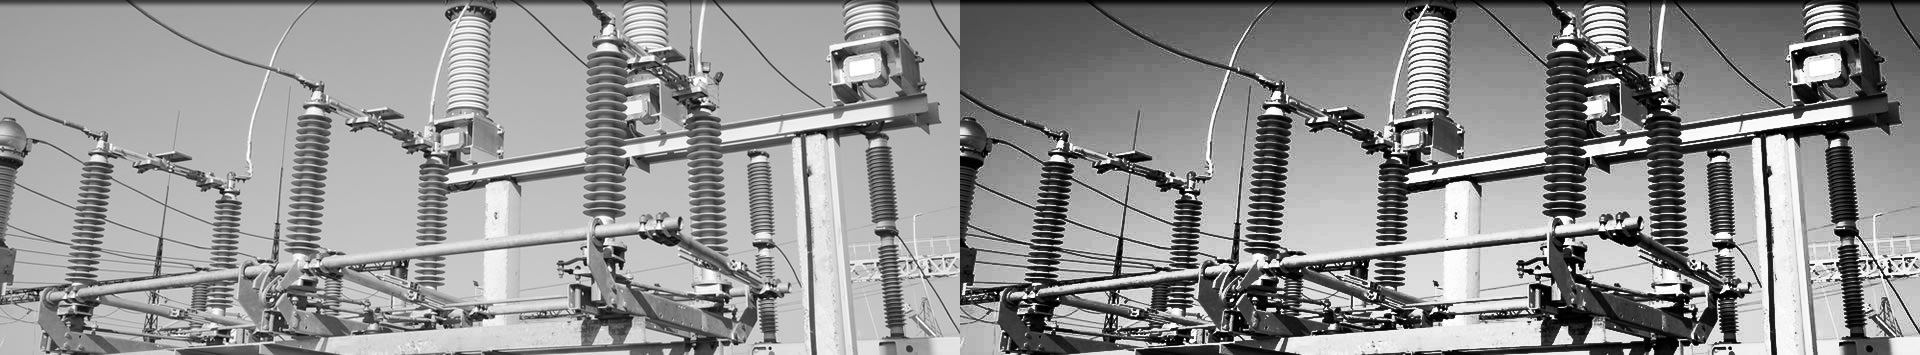

In [4]:
import numpy as np #for scientific calculations
img = cv2.imread(image_path,0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('result.png',res)
cv2_imshow(res)
#left side> raw image       Right side> after applying histogram equalization

In [5]:
#

IMAGE DENOISING 

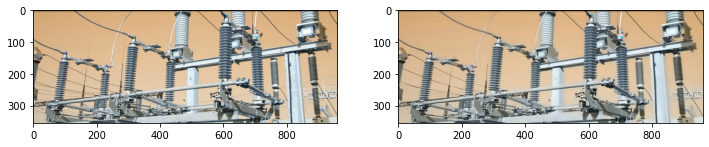

In [6]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread(image_path)
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
#left side raw image             right side denoised image

APPLYING GAUSSIAN BLUR 

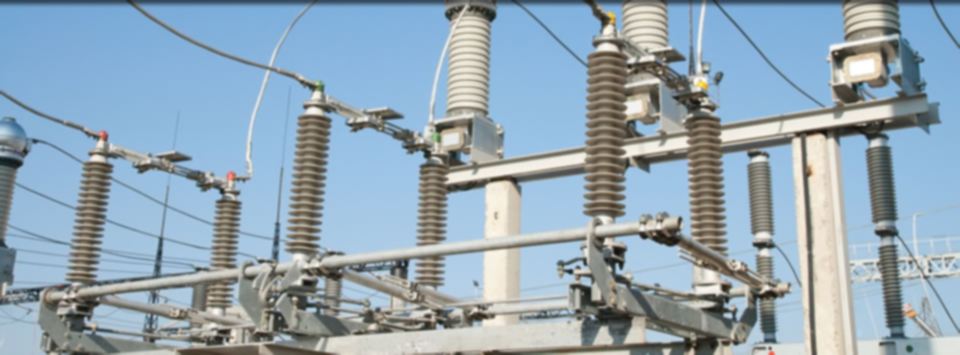

<Figure size 864x720 with 0 Axes>

In [7]:
gaussian_applied=cv2.GaussianBlur(img,(5,5),0)
plt.figure(figsize=(12,10))
cv2_imshow(gaussian_applied)

EDGE DETECTION USING CANNY EDGE DETECTION ALGORITHM

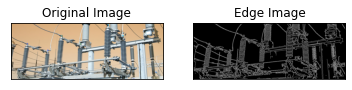

In [8]:

edges = cv2.Canny(img,300,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

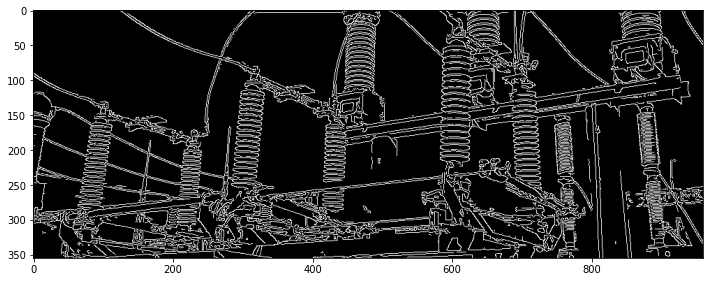

In [9]:
plt.figure(figsize=(12,10))
plt.imshow(edges,cmap='gray')

In [10]:
#model for fault detection in a single phase line 

In [11]:
#importing the required libraries
import pickle
import pandas as pd
import cv2
from keras.models import *
from keras.layers import *
import numpy as np


In [43]:
df=pd.read_csv('/content/Data_for_UCI_named(1).csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [44]:
x=df.drop(['stabf'],axis=1)
y=df['stabf']


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['stabf']=encoder.fit_transform(df['stabf'])

In [47]:

df['stabf']

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: stabf, Length: 10000, dtype: int64

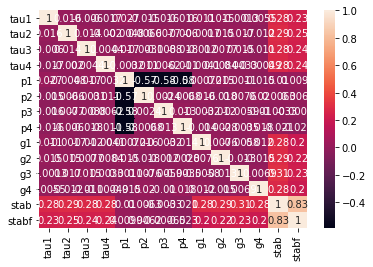

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [65]:
x_train,y_train,x_test,y_test=train_test_split(x,df['stabf'],test_size=0.3,random_state=24)
x_train,y_train=scaler.fit_transform(x_train),scaler.fit_transform(y_train)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,x_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
model.feature_importances_

array([0.04181   , 0.05146839, 0.03475982, 0.03677391, 0.00299283,
       0.00346303, 0.00350953, 0.00325755, 0.01956528, 0.02348395,
       0.02497189, 0.02114414, 0.73279967])

In [68]:
list(zip(df.columns,model.feature_importances_))

[('tau1', 0.041809996901326925),
 ('tau2', 0.051468392081974484),
 ('tau3', 0.03475981790529434),
 ('tau4', 0.03677391068149996),
 ('p1', 0.0029928323348763137),
 ('p2', 0.0034630329428627497),
 ('p3', 0.0035095271279881085),
 ('p4', 0.0032575534530932338),
 ('g1', 0.019565283555746566),
 ('g2', 0.023483949203719778),
 ('g3', 0.02497189313460864),
 ('g4', 0.021144143751762802),
 ('stab', 0.7327996669252461)]

In [69]:
model.score(x_train,x_test)

1.0

In [70]:
model.score(y_train,y_test)

0.999

In [71]:
y_pred=model.predict(y_train)


In [72]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.999

In [73]:
df.loc[0]

tau1     2.959060
tau2     3.079885
tau3     8.381025
tau4     9.780754
p1       3.763085
p2      -0.782604
p3      -1.257395
p4      -1.723086
g1       0.650456
g2       0.859578
g3       0.887445
g4       0.958034
stab     0.055347
stabf    1.000000
Name: 0, dtype: float64

In [74]:
metrics.confusion_matrix(y_test,y_pred)

array([[1099,    3],
       [   0, 1898]])

In [77]:
#user inputs
tau1=float(input('enter value for tau1:'))
tau2=float(input('enter value for tau2:'))
tau3=float(input('enter value for tau3:'))
tau4=float(input('enter value for tau4:'))
p1=float(input('enter value for p1:'))
p2=float(input('enter value for p2:'))
p3=float(input('enter value for p3:'))
p4=float(input('enter value for p4:'))
g1=float(input('enter value for g1:'))
g2=float(input('enter value for g2:'))
g3=float(input('enter value for g3:'))
g4=float(input('enter value for g4:'))
stab=float(input('enter value for stab:'))


enter value for tau1:1
enter value for tau2:2
enter value for tau3:3
enter value for tau4:1
enter value for p1:2
enter value for p2:1
enter value for p3:2
enter value for p4:3
enter value for g1:1
enter value for g2:2
enter value for g3:3
enter value for g4:1
enter value for stab:0.9


In [78]:
dict_data={'tau1':tau1, 'tau2':tau2, 'tau3':tau3, 'tau4':tau4, 'p1':p1, 'p2':p2, 'p3':p3, 'p4':p4, 'g1':g1, 'g2':g2,
       'g3':g3, 'g4':g4, 'stab':stab}

In [79]:
data_df=pd.DataFrame(dict_data,index=[0])

In [80]:
data_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,0.9


In [83]:
while 1:
  res=model.predict(data_df)
  if res != 0:
    print(encoder.inverse_transform([res]))
    break

['unstable']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
